In [10]:
import numpy as np
import qiskit as qk

In [11]:
def theta_gate(qc, theta, i):
    
    assert len(theta)==3, "theta incorrect size"
    
    qc.rz(theta[0], i)
    qc.rx(theta[1], i)
    qc.rz(theta[2], i)
    
    return 0

def entangling_gate(qc, n):

    for i in range(0, n-1, 2):
            qc.cx(i, i+1)
    for i in range(1, n-1, 2):
            qc.cx(i, i+1)

    return 0
    ###

In [12]:
def HEA(qc, theta, n, l):

    Theta = np.reshape(theta, (n,l,3))
    
    for i in range(l):
        for j in range(n):

            theta_gate(qc, Theta[j,i,:], j) 
        entangling_gate(qc, n)
    qc.measure_all()
    return qc

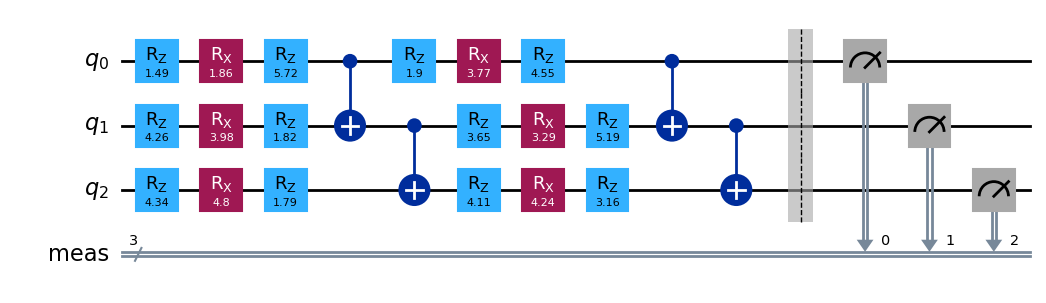

In [13]:
n = 3
l = 2
Theta = 2*np.pi*np.random.random(n*l*3)
qc = qk.QuantumCircuit(n)
qc = HEA(qc, Theta, n, l)

qc.draw('mpl')